<a href="https://colab.research.google.com/github/paulpkp21/INSE_6220_Project/blob/main/Project_INSE_6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Python Libraries**

In [721]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (14,10)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta

<Figure size 1008x720 with 0 Axes>

**Read Data from .CSV File**

In [722]:
df = pd.read_csv('https://raw.githubusercontent.com/paulpkp21/INSE_6220_Project/main/Rice_Classification_Data.csv')
df.head(30)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487,1
1,2,4301,94.915392,59.822820,0.776372,4427,74.001374,0.801230,257.607,0.814449,1.586608,1
2,3,3475,84.581148,53.191205,0.777504,3539,66.516971,0.652215,221.295,0.891706,1.590134,1
3,4,5619,102.993590,72.791165,0.707459,5911,84.583290,0.694046,294.707,0.812995,1.414919,0
4,5,6653,111.027948,78.276008,0.709196,6814,92.037290,0.634344,313.111,0.852768,1.418416,0
5,6,4842,155.783126,39.823444,0.966774,4958,78.517679,0.409056,332.994,0.548734,3.911845,1
6,7,5960,109.106500,72.640478,0.746152,6089,87.112041,0.734171,299.743,0.833601,1.502007,0
7,8,5048,157.735369,40.796832,0.965974,5161,80.170526,0.551694,336.835,0.559107,3.866363,1
8,9,6322,112.833855,74.002277,0.754890,6487,89.718562,0.781942,307.401,0.840725,1.524735,0
9,10,6314,112.412026,73.667294,0.755340,6510,89.661778,0.638423,311.873,0.815753,1.525942,0


In [723]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50 non-null     int64  
 1   Area             50 non-null     int64  
 2   MajorAxisLength  50 non-null     float64
 3   MinorAxisLength  50 non-null     float64
 4   Eccentricity     50 non-null     float64
 5   ConvexArea       50 non-null     int64  
 6   EquivDiameter    50 non-null     float64
 7   Extent           50 non-null     float64
 8   Perimeter        50 non-null     float64
 9   Roundness        50 non-null     float64
 10  AspectRation     50 non-null     float64
 11  Class            50 non-null     int64  
dtypes: float64(8), int64(4)
memory usage: 4.8 KB


**Check Number of Duplicate Data**

In [724]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [725]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Class**

In [726]:
y = df['Class']
classess_y = y.copy() # Edit
target = df['Class'].to_numpy()

**Exploratory Data Analysis**

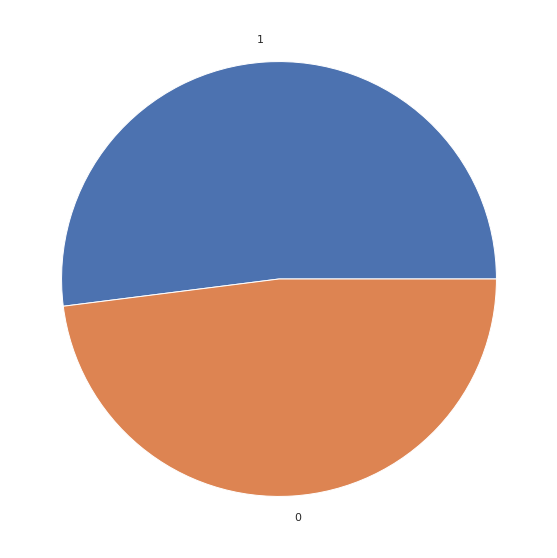

In [727]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Features**

Data Matrix

In [728]:
X = df.drop(columns=['Class'])
X.head(10)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,1,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487
1,2,4301,94.915392,59.822820,0.776372,4427,74.001374,0.801230,257.607,0.814449,1.586608
2,3,3475,84.581148,53.191205,0.777504,3539,66.516971,0.652215,221.295,0.891706,1.590134
3,4,5619,102.993590,72.791165,0.707459,5911,84.583290,0.694046,294.707,0.812995,1.414919
4,5,6653,111.027948,78.276008,0.709196,6814,92.037290,0.634344,313.111,0.852768,1.418416
5,6,4842,155.783126,39.823444,0.966774,4958,78.517679,0.409056,332.994,0.548734,3.911845
6,7,5960,109.106500,72.640478,0.746152,6089,87.112041,0.734171,299.743,0.833601,1.502007
7,8,5048,157.735369,40.796832,0.965974,5161,80.170526,0.551694,336.835,0.559107,3.866363
8,9,6322,112.833855,74.002277,0.754890,6487,89.718562,0.781942,307.401,0.840725,1.524735
9,10,6314,112.412026,73.667294,0.755340,6510,89.661778,0.638423,311.873,0.815753,1.525942


In [729]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,50.0,25.500000,14.577380,1.000000,13.250000,25.500000,37.750000,50.000000
Area,50.0,6162.560000,1203.963830,3475.000000,5615.250000,6106.500000,6705.000000,9534.000000
MajorAxisLength,50.0,142.811459,22.959063,84.581148,129.178096,147.044904,159.966429,173.715474
MinorAxisLength,50.0,57.048384,12.292009,36.610230,46.036764,54.175433,67.721687,78.276008
Eccentricity,50.0,0.892681,0.078844,0.707459,0.843900,0.921967,0.958384,0.966774
ConvexArea,50.0,6324.660000,1217.519855,3539.000000,5764.250000,6244.500000,6954.000000,9726.000000
EquivDiameter,50.0,88.151081,8.794828,66.516971,84.555060,88.175017,92.396223,110.177429
Extent,50.0,0.590958,0.130340,0.385562,0.483976,0.581910,0.666645,0.851106
Perimeter,50.0,332.550620,33.713062,221.295000,319.478000,335.644000,355.234250,396.700000
Roundness,50.0,0.702922,0.111453,0.548734,0.601569,0.697736,0.814086,0.891706


**Standardize the Data**

In [730]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [731]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,50.0,0.000000e+00,1.010153,-1.697749,-0.848875,0.000000,0.848875,1.697749
Area,50.0,-3.275158e-16,1.010153,-2.254923,-0.459205,-0.047036,0.455119,2.828713
MajorAxisLength,50.0,-3.330669e-16,1.010153,-2.562016,-0.599841,0.186263,0.754784,1.359714
MinorAxisLength,50.0,-2.797762e-16,1.010153,-1.679600,-0.904931,-0.236098,0.877128,1.744478
Eccentricity,50.0,4.796163e-16,1.010153,-2.373080,-0.624977,0.375221,0.841803,0.949289
ConvexArea,50.0,1.276756e-16,1.010153,-2.311208,-0.464961,-0.066507,0.522151,2.822026
EquivDiameter,50.0,3.175238e-16,1.010153,-2.484841,-0.413030,0.002749,0.487587,2.529893
Extent,50.0,-1.110223e-17,1.010153,-1.591849,-0.829127,-0.070125,0.586589,2.016192
Perimeter,50.0,5.517808e-16,1.010153,-3.333579,-0.391698,0.092688,0.679675,1.922123
Roundness,50.0,4.707346e-16,1.010153,-1.397481,-0.918614,-0.047002,1.007534,1.711042


**Observations and Variables**

In [732]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']


**Data Visualization**

**Class Distribution**

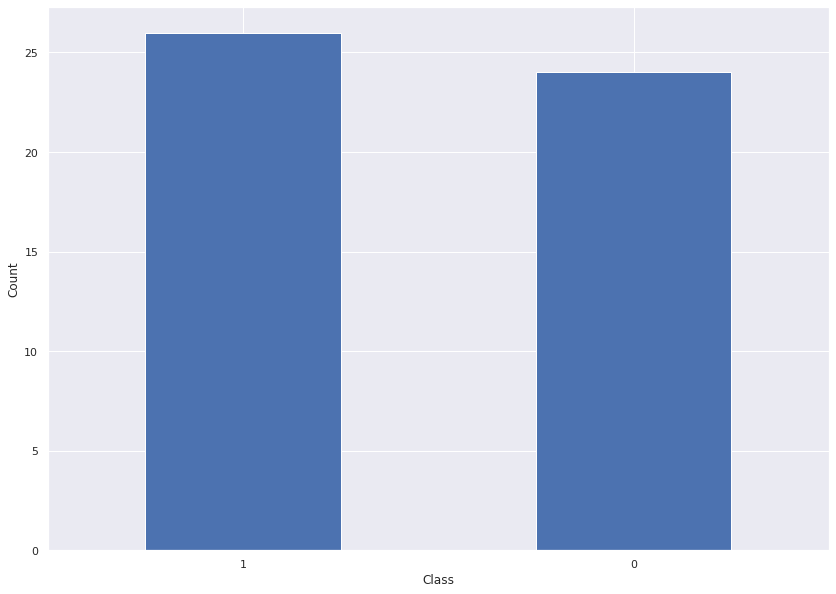

In [733]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Box and Whisker Plots**

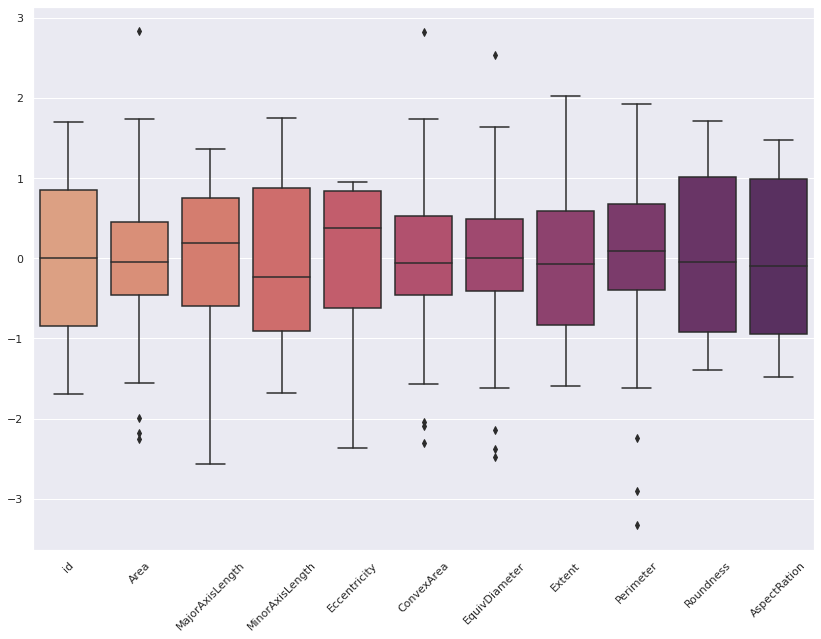

In [734]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="flare")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

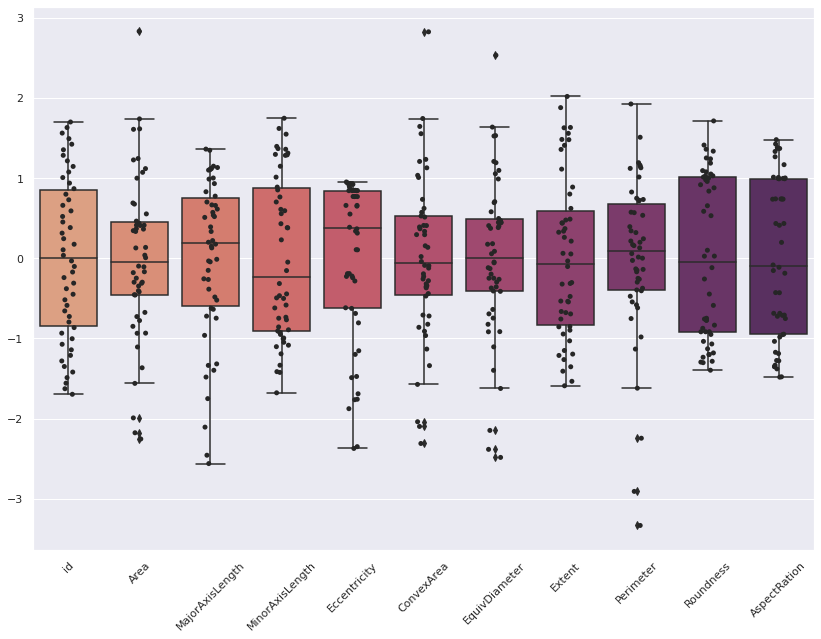

In [735]:
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="flare")
ax = sns.stripplot(data=df, color=".15") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Five Number Summary**

In [736]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
count,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,0.000000,-3.275158e-16,-3.330669e-16,-2.797762e-16,4.796163e-16,1.276756e-16,3.175238e-16,-1.110223e-17,5.517808e-16,4.707346e-16,-1.665335e-16
std,1.010153,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.697749,-2.254923e+00,-2.562016e+00,-1.679600e+00,-2.373080e+00,-2.311208e+00,-2.484841e+00,-1.591849e+00,-3.333579e+00,-1.397481e+00,-1.484088e+00
25%,-0.848875,-4.592053e-01,-5.998406e-01,-9.049306e-01,-6.249765e-01,-4.649613e-01,-4.130303e-01,-8.291270e-01,-3.916980e-01,-9.186141e-01,-9.515817e-01
50%,0.000000,-4.703559e-02,1.862631e-01,-2.360981e-01,3.752208e-01,-6.650719e-02,2.749264e-03,-7.012478e-02,9.268768e-02,-4.700195e-02,-9.966960e-02
75%,0.848875,4.551193e-01,7.547841e-01,8.771279e-01,8.418035e-01,5.221512e-01,4.875867e-01,5.865892e-01,6.796750e-01,1.007534e+00,9.920782e-01
max,1.697749,2.828713e+00,1.359714e+00,1.744478e+00,9.492894e-01,2.822026e+00,2.529893e+00,2.016192e+00,1.922123e+00,1.711042e+00,1.477113e+00


**Pair Plot**

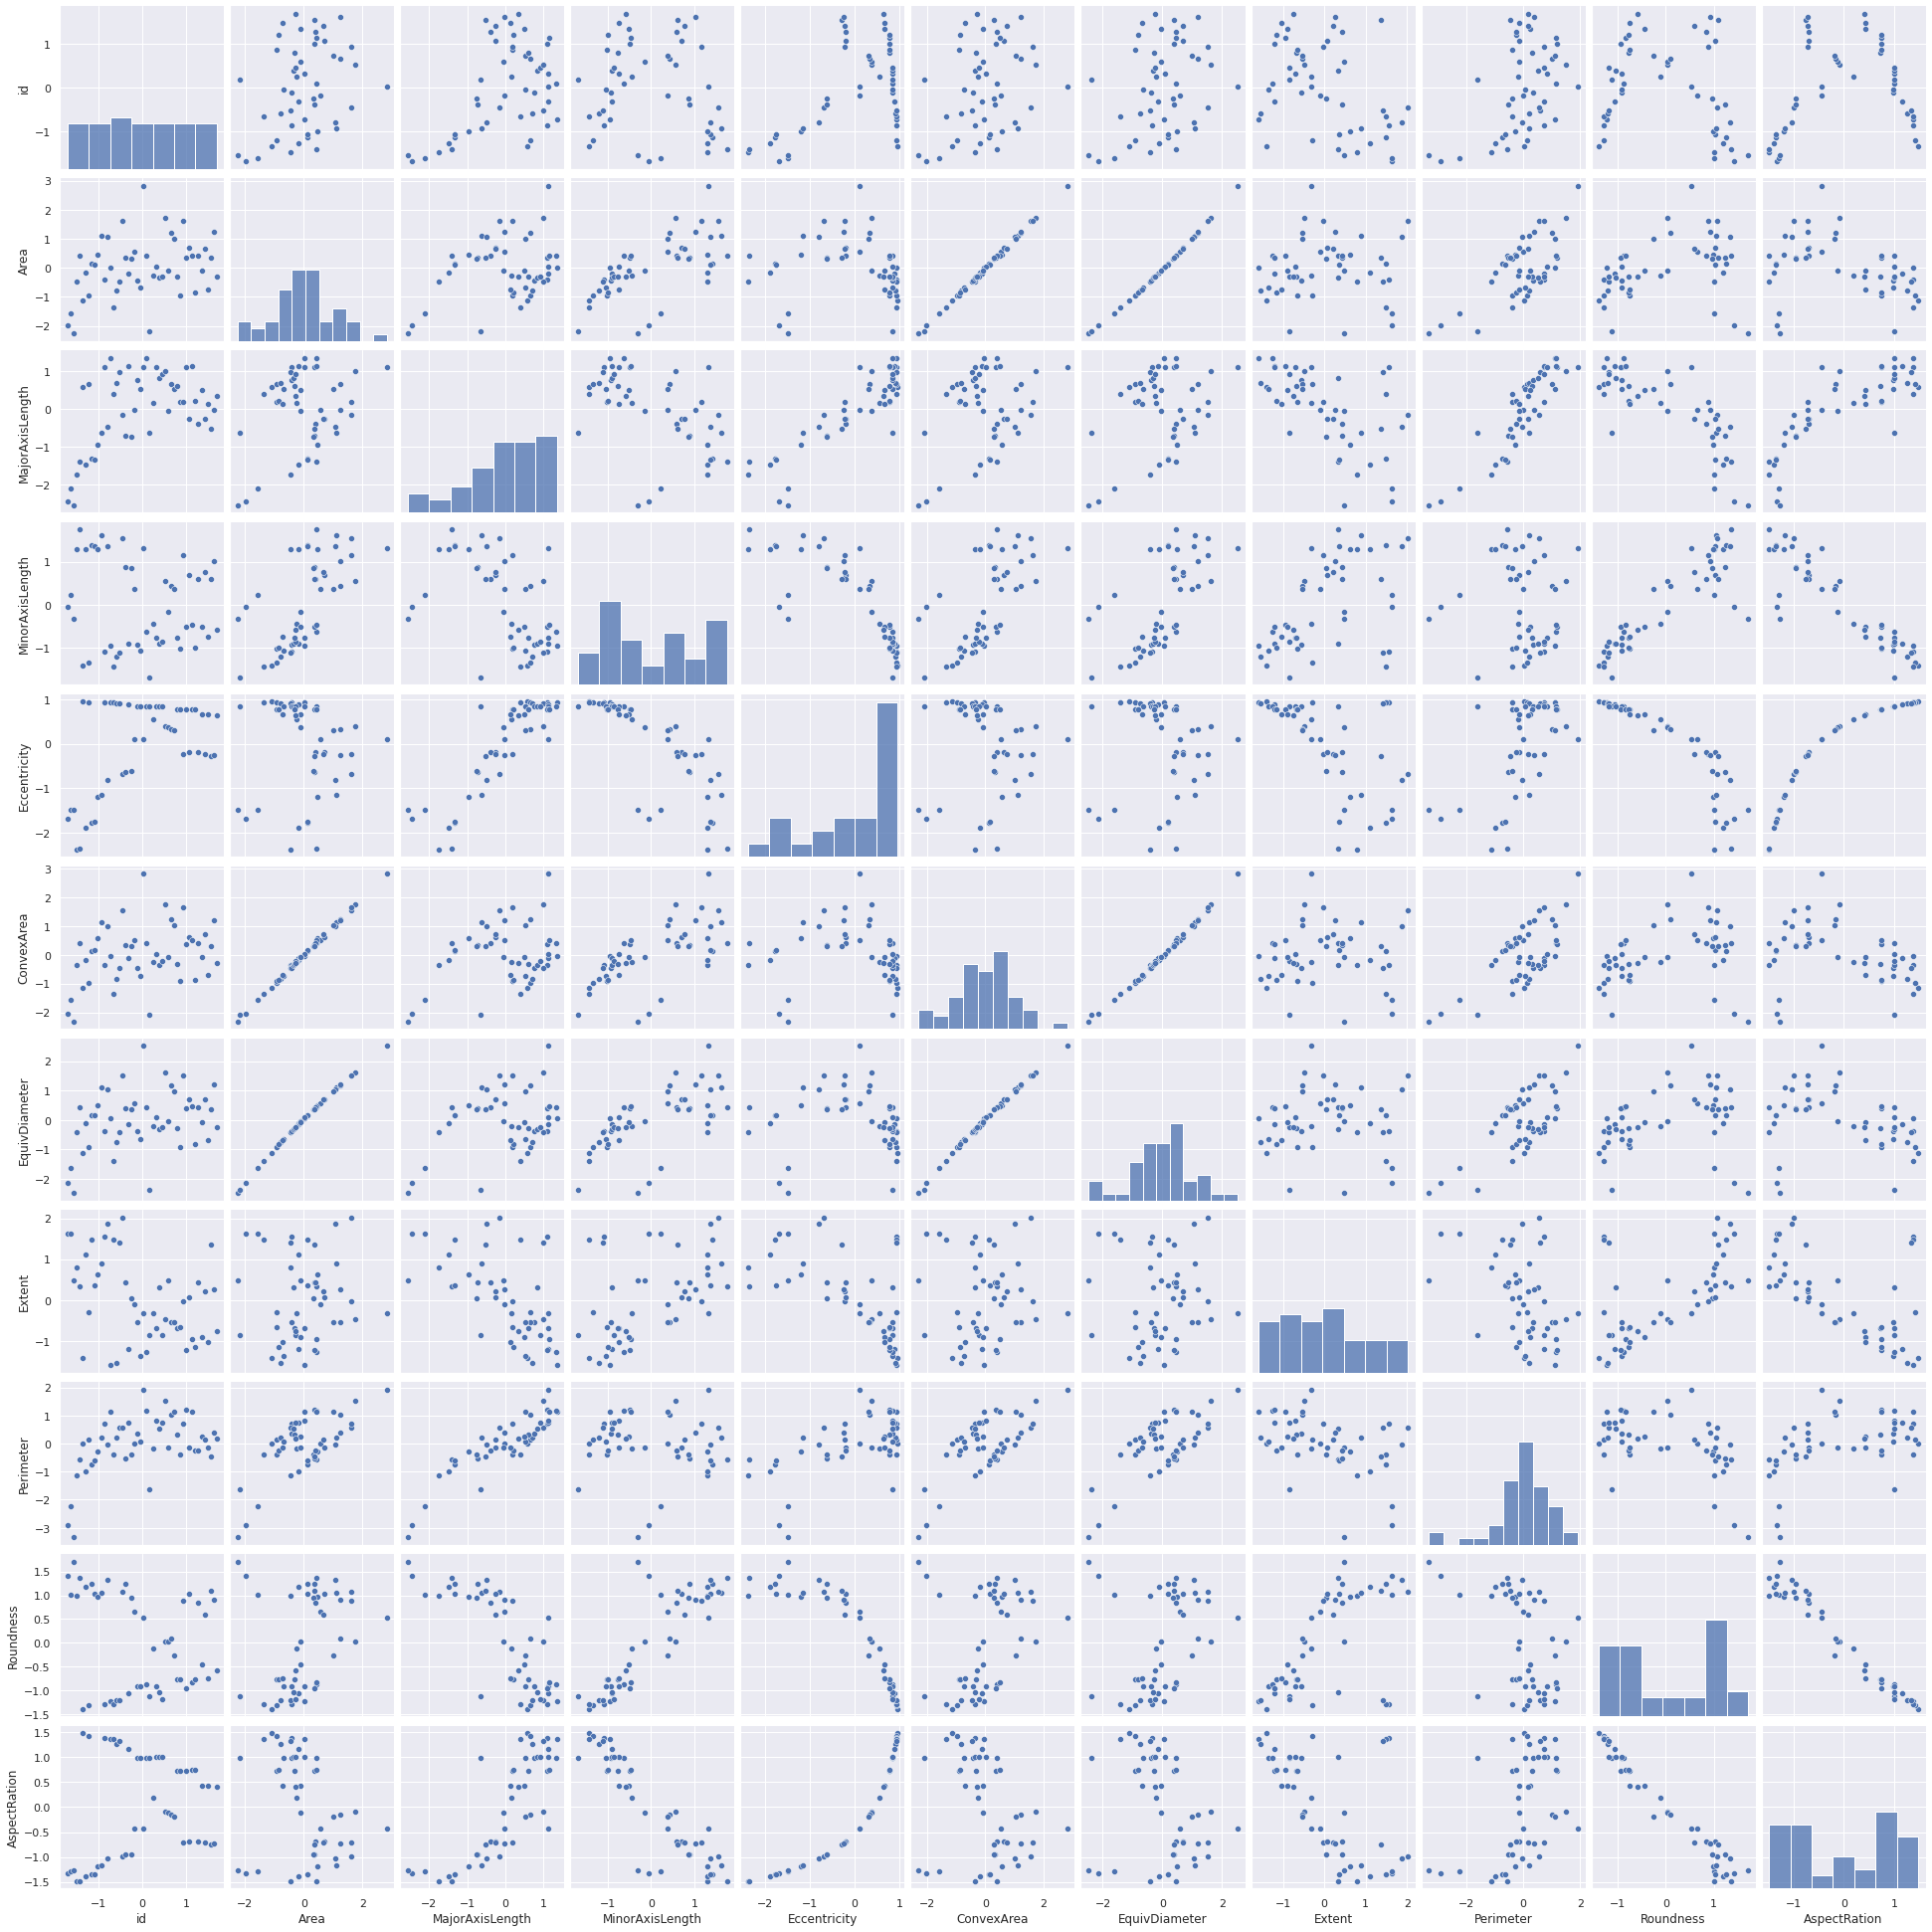

In [737]:
sns.pairplot(df)
plt.show()

**Covariance Matrix**

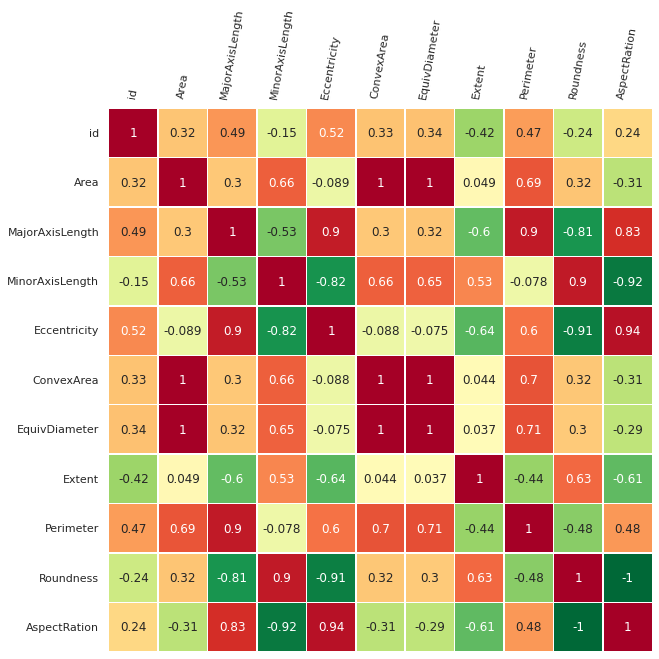

In [738]:
ax = sns.heatmap((df - df.mean()).cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80);

**Principal Component Analysis**

Text(0, 0.5, '$Z_2$')

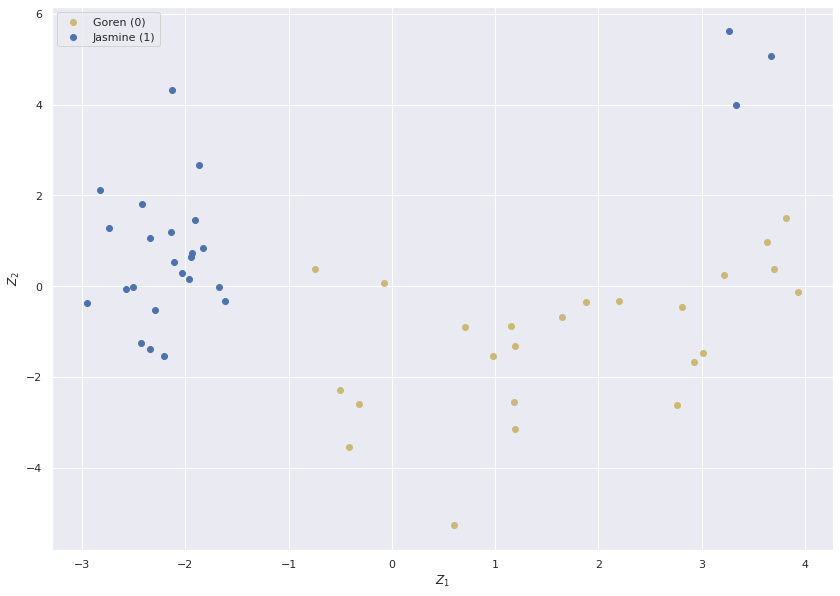

In [739]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Goren)->0,  2(Jasmine)->1
idx_Goren = np.where(y == 0)
idx_Jasmine = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Goren,0], Z[idx_Goren,1], c='y', label='Goren (0)')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='b', label='Jasmine (1)')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigen Vector**

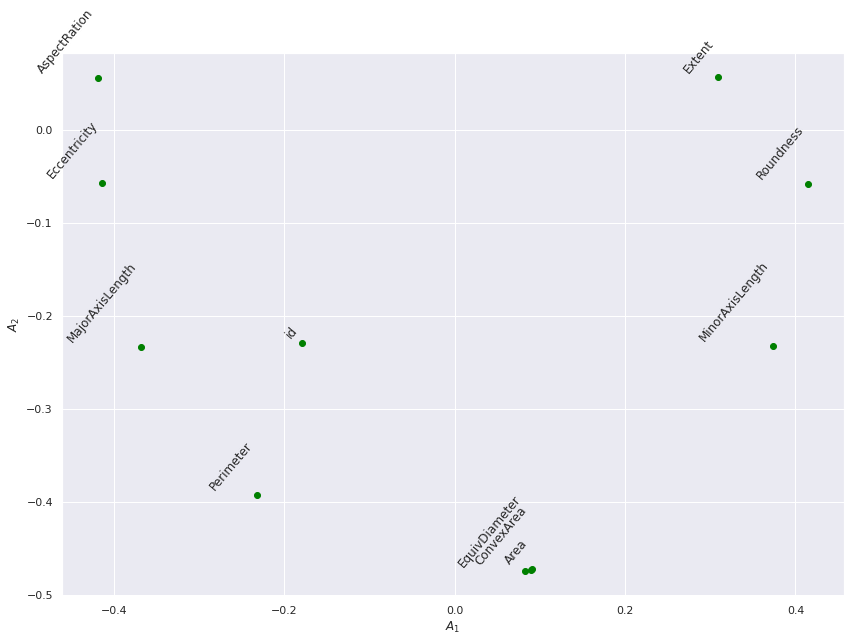

In [740]:
A = pca.components_.T

plt.figure()
plt.scatter(A[:,0],A[:,1],c='Green')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom', rotation=50)

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


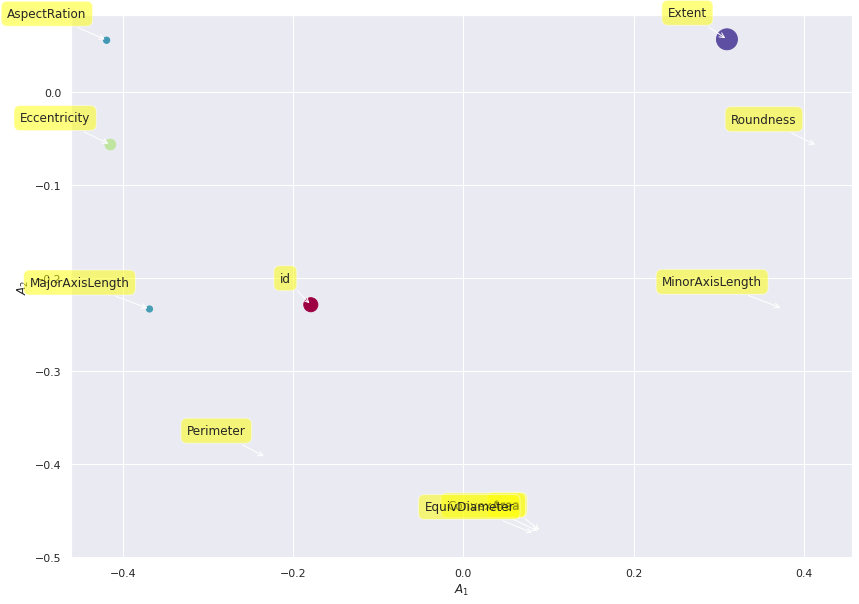

In [741]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Screen Plot**

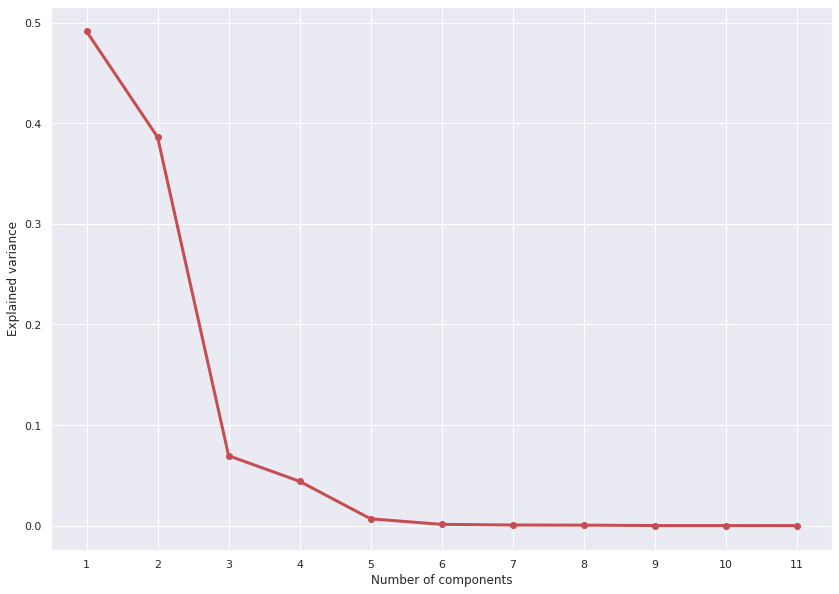

In [742]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

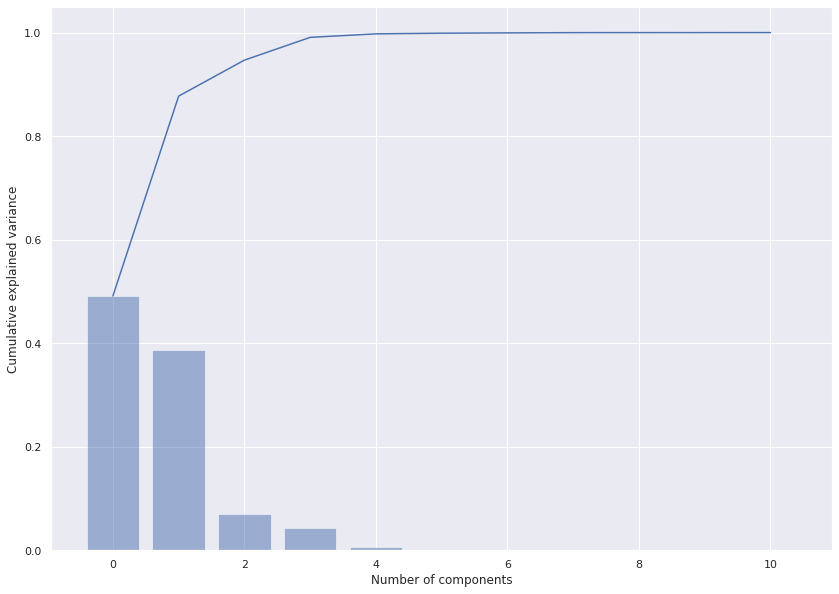

In [743]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [744]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (49.1%)',
 '1': 'PC 2 (38.6%)',
 '2': 'PC 3 (6.9%)',
 '3': 'PC 4 (4.4%)',
 '4': 'PC 5 (0.7%)',
 '5': 'PC 6 (0.1%)',
 '6': 'PC 7 (0.1%)',
 '7': 'PC 8 (0.0%)',
 '8': 'PC 9 (0.0%)',
 '9': 'PC 10 (0.0%)',
 '10': 'PC 11 (0.0%)'}

**Biplot**

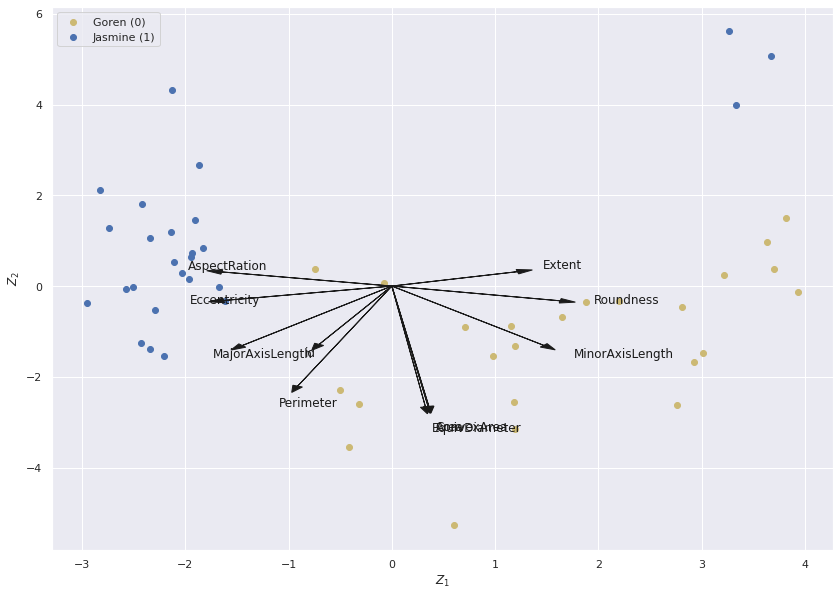

In [745]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.10)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Goren,0], Z[idx_Goren,1], c='y', label='Goren (0)')
plt.scatter(Z[idx_Jasmine,0], Z[idx_Jasmine,1], c='b', label='Jasmine (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Using PCA Library**

In [746]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [747]:
from pca import pca
model = pca()
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [748]:
print(out['topfeat'])

     PC          feature   loading  type
0   PC1     AspectRation -0.418853  best
1   PC2    EquivDiameter -0.474713  best
2   PC3               id -0.828458  best
3   PC4           Extent  0.876016  best
4   PC2             Area -0.472231  weak
5   PC1  MajorAxisLength -0.368479  weak
6   PC1  MinorAxisLength  0.374198  weak
7   PC1     Eccentricity -0.414407  weak
8   PC2       ConvexArea -0.472878  weak
9   PC2        Perimeter -0.392743  weak
10  PC1        Roundness  0.414856  weak


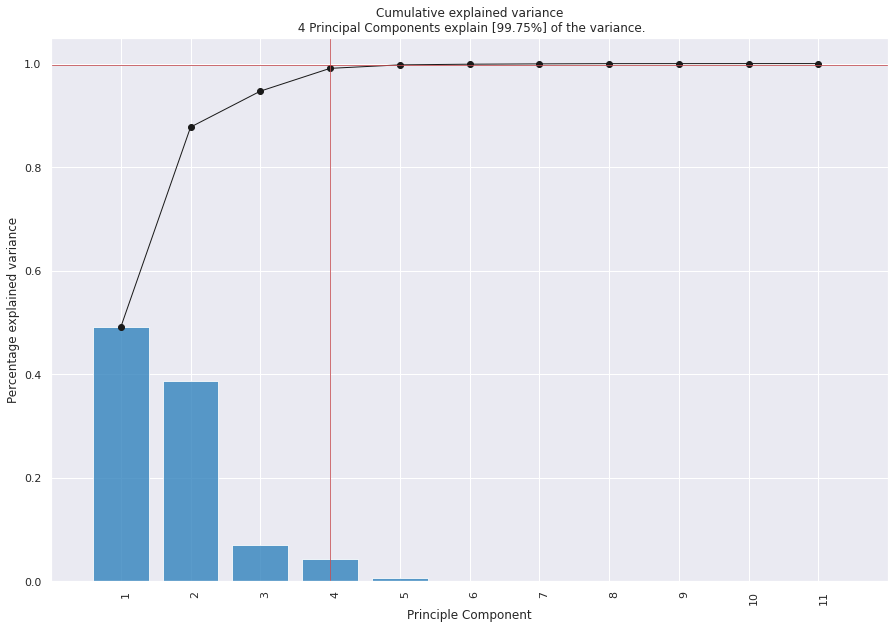

<Figure size 1008x720 with 0 Axes>

In [749]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].


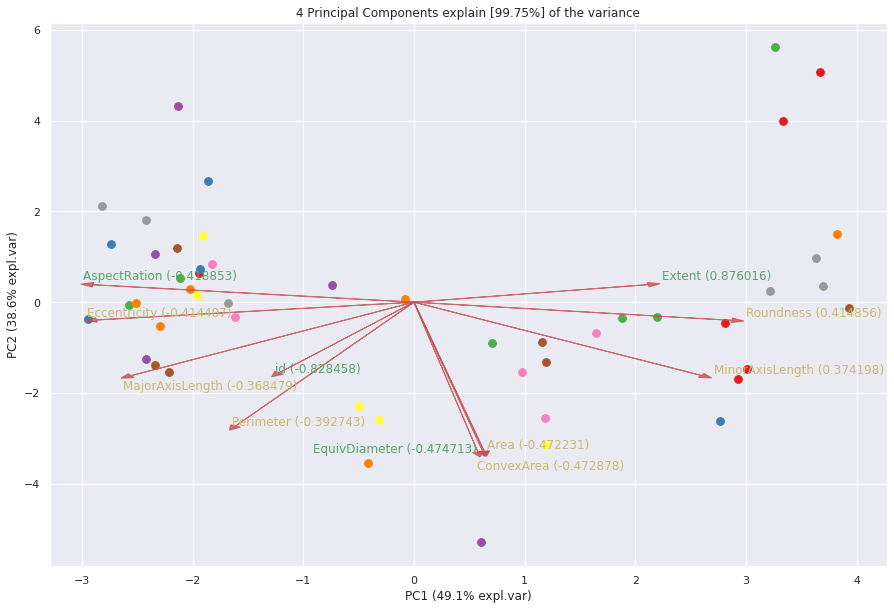

In [750]:
ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].


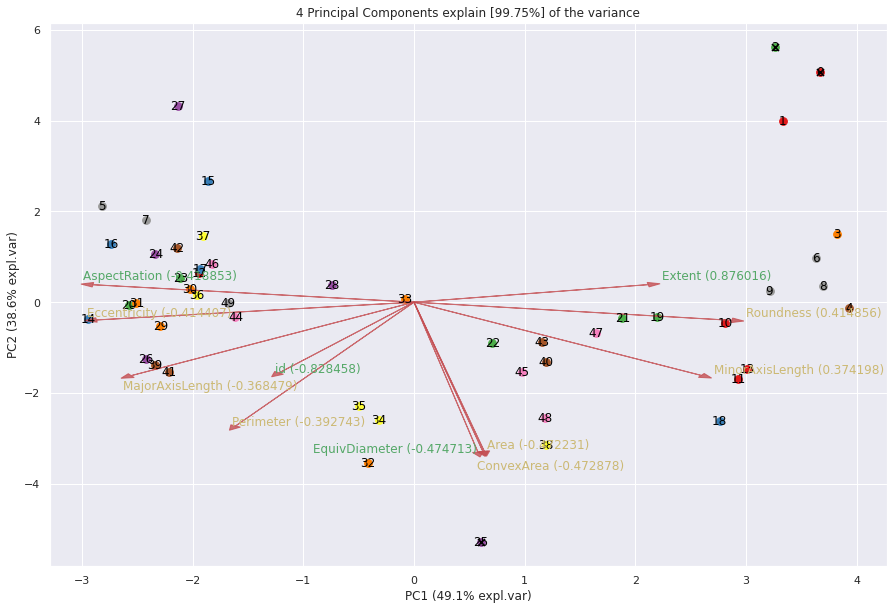

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff4b73183a0>)

In [751]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


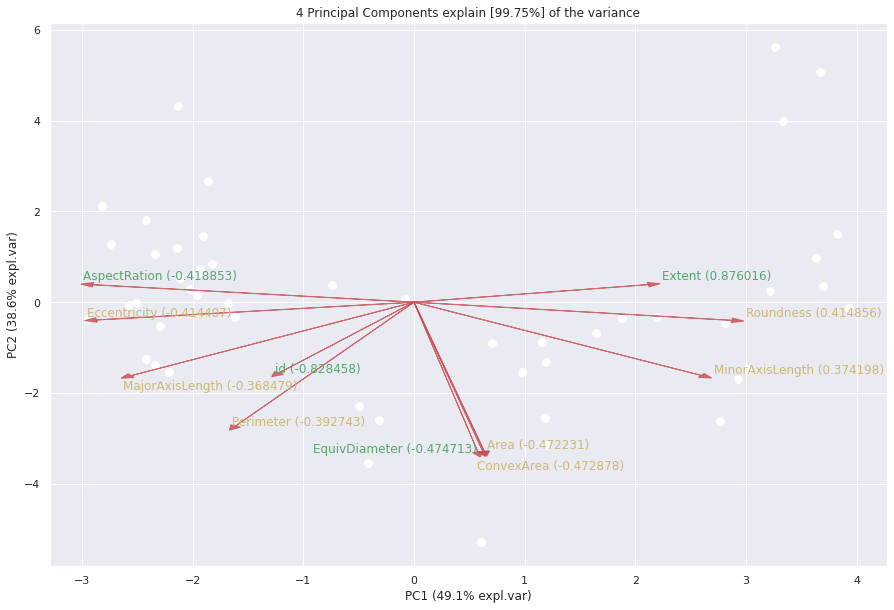

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff4b8bae130>)

In [752]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [50] unique colors! Available unique colors: [9].


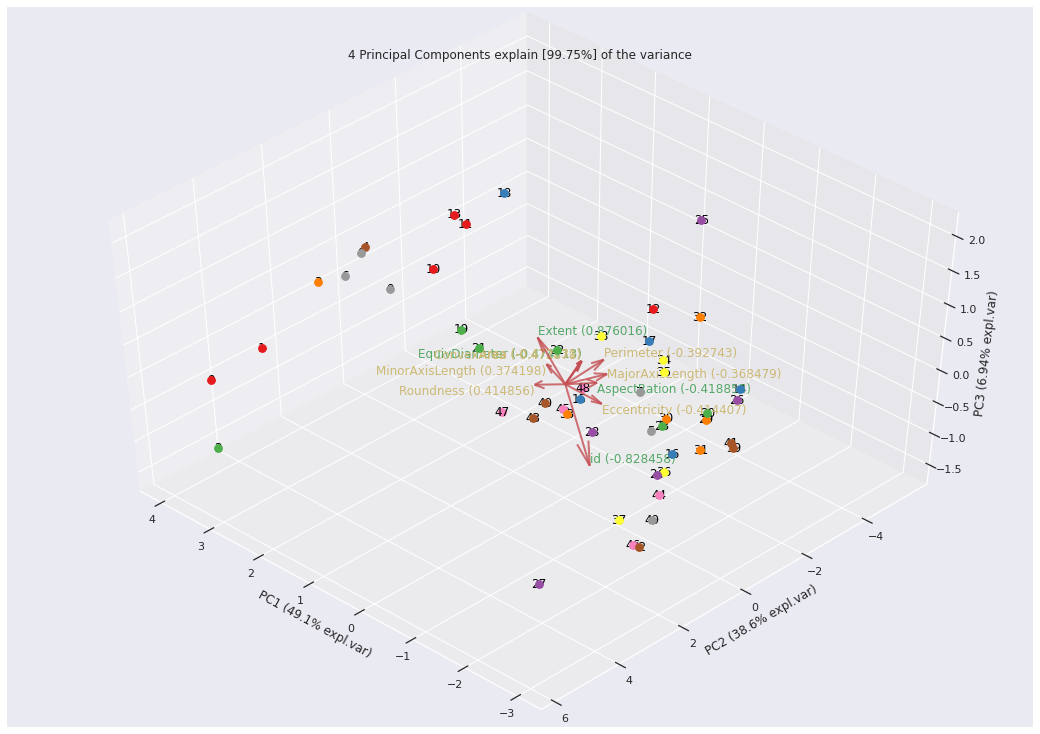

In [753]:
ax = model.biplot3d(legend=False)

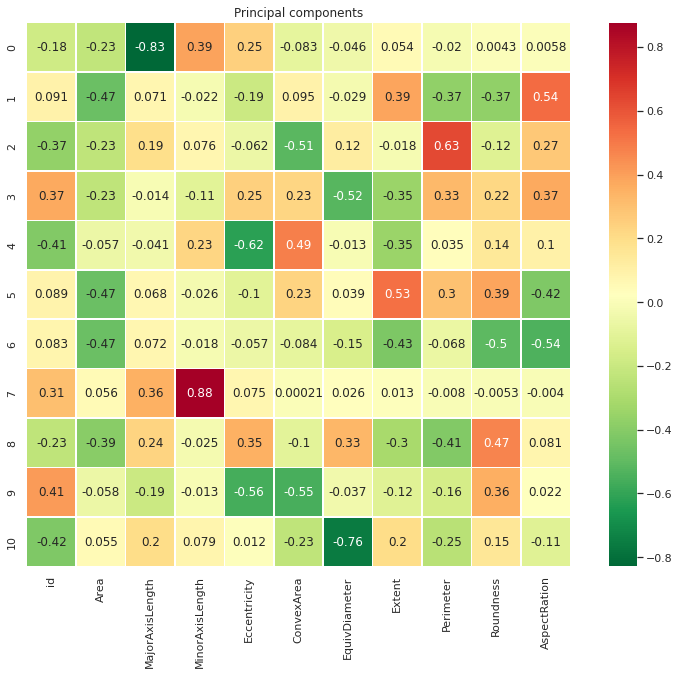

PC1:[-0.17910706  0.09127461 -0.36847871  0.37419769 -0.41440702  0.08945789
  0.08299104  0.30943091 -0.23210976  0.41485565 -0.41885331]
PC2:[-0.22881746 -0.47223147 -0.23340606 -0.23265054 -0.05663604 -0.47287842
 -0.47471307  0.0564796  -0.39274338 -0.05783831  0.05548538]


In [754]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

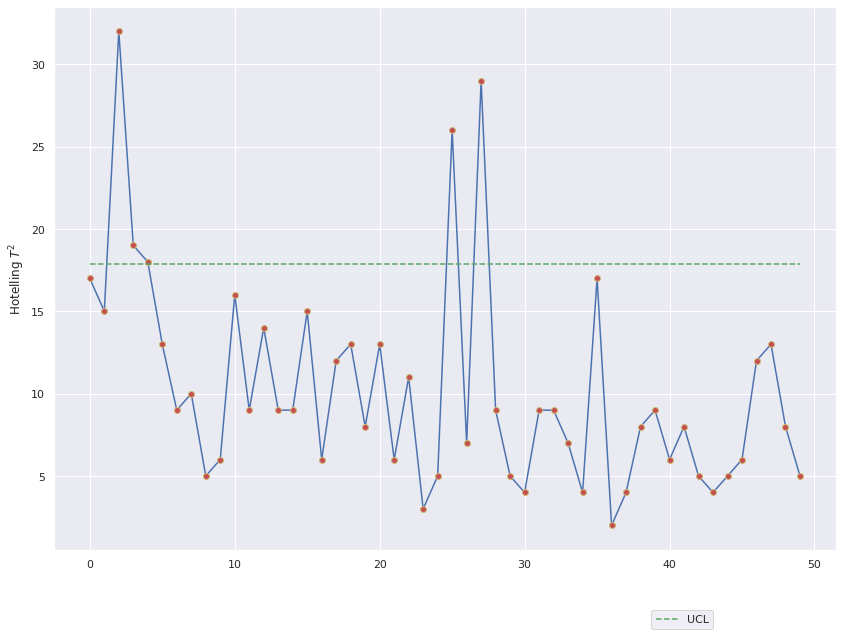

In [755]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [756]:
print(np.argwhere(Tsquare>UCL))

[[ 2]
 [ 3]
 [ 4]
 [25]
 [27]]


**Control Charts for Principal Components**

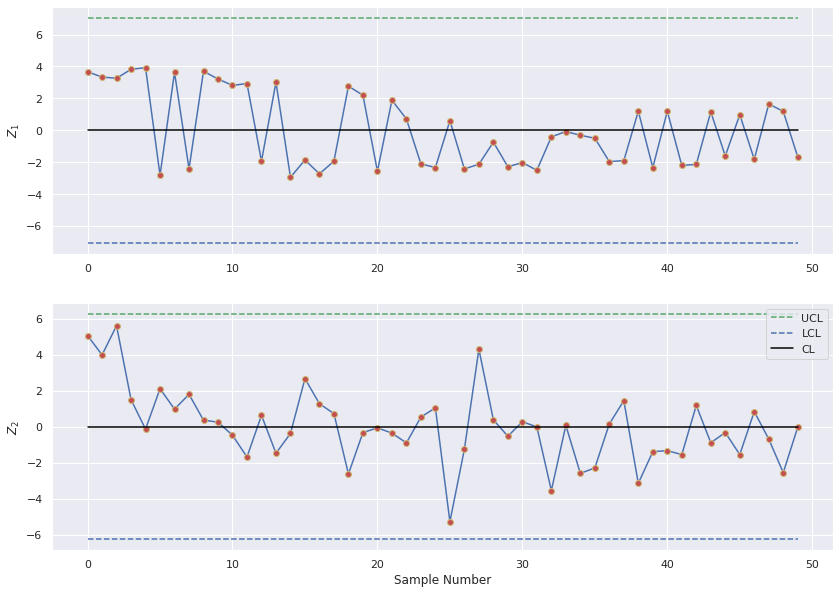

In [757]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

*Out of Control Points*

In [758]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


**Multi-Class Classification**

In [759]:
# Test-Train Split
# X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df,classess_y, test_size=0.3, random_state=0) 
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z,classess_y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], classess_y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 35
Test Dataset Size: 15


**Gaussian Naive Bayes (GNB)**

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.800     0.889        10
           1      0.714     1.000     0.833         5

    accuracy                          0.867        15
   macro avg      0.857     0.900     0.861        15
weighted avg      0.905     0.867     0.870        15



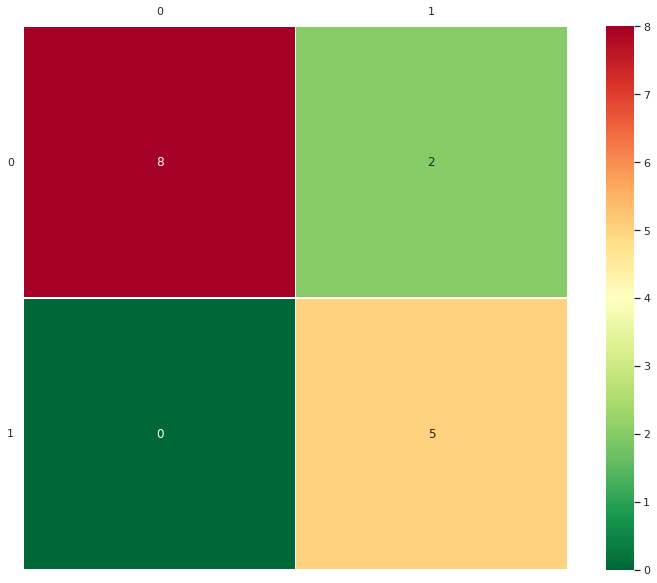

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.750     0.600     0.667        10
           1      0.429     0.600     0.500         5

    accuracy                          0.600        15
   macro avg      0.589     0.600     0.583        15
weighted avg      0.643     0.600     0.611        15



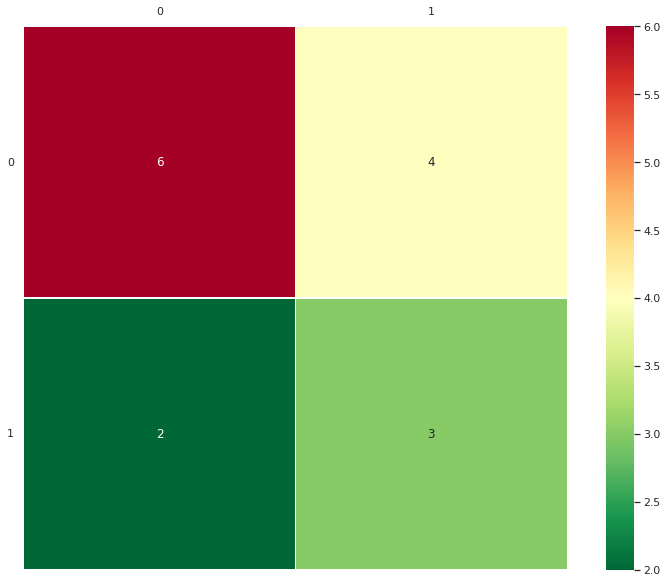

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.889     0.800     0.842        10
           1      0.667     0.800     0.727         5

    accuracy                          0.800        15
   macro avg      0.778     0.800     0.785        15
weighted avg      0.815     0.800     0.804        15



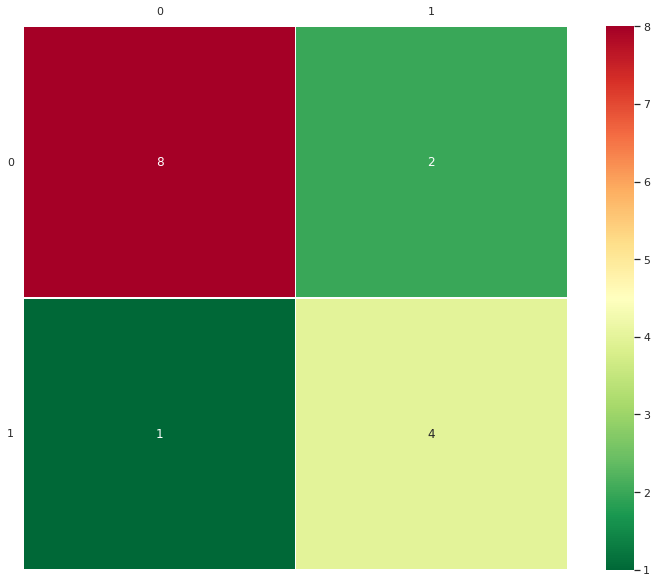

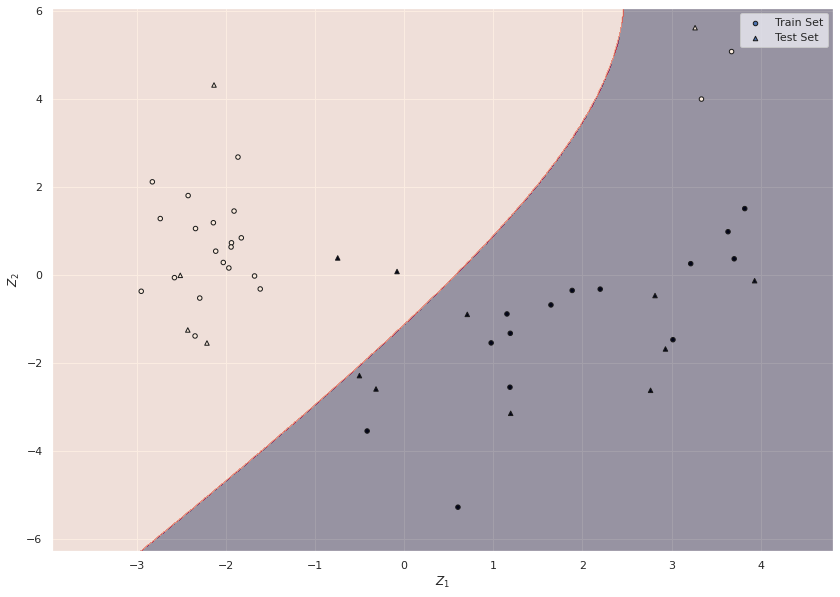

(array([ 0,  4, 10]),)


In [760]:
from sklearn.naive_bayes import GaussianNB   # Edit
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

**K Nearest Neighbors (KNN)**

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    elif y.ndim == 2:
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return get_scorer(scoring)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    Works with sparse matrices. Only works if ``rows_`` and
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 175, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 616, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 28, n_nei

Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}
                                    0         1         2         3         4
knn_full_data fit_time       0.003587  0.003340  0.003234  0.002950  0.003076
knn_Z  fit_time              0.001268  0.010810  0.003905  0.001384  0.001199
knn_Z12 fit_time             0.001212  0.001193  0.001205  0.001101  0.001163
knn_full_data test_f1_macro  1.000000  1.000000  0.857143  1.000000  0.857143
knn_Z  test_f1_macro         1.000000  1.000000  0.857143  1.000000  0.857143
knn_Z12 test_f1_macro        1.000000  1.000000  0.857143  1.000000  0.857143

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.900     0.947        10
           1      0.833     1.000     0.909         5

    accuracy                          0.933        15
   macro avg      0.917     0.950     0.928        15
weighted avg      0.944     0.933   

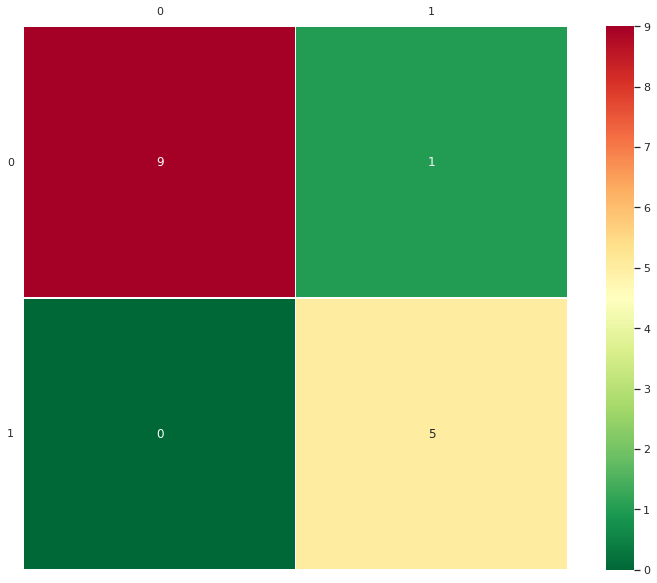

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.900     0.947        10
           1      0.833     1.000     0.909         5

    accuracy                          0.933        15
   macro avg      0.917     0.950     0.928        15
weighted avg      0.944     0.933     0.935        15



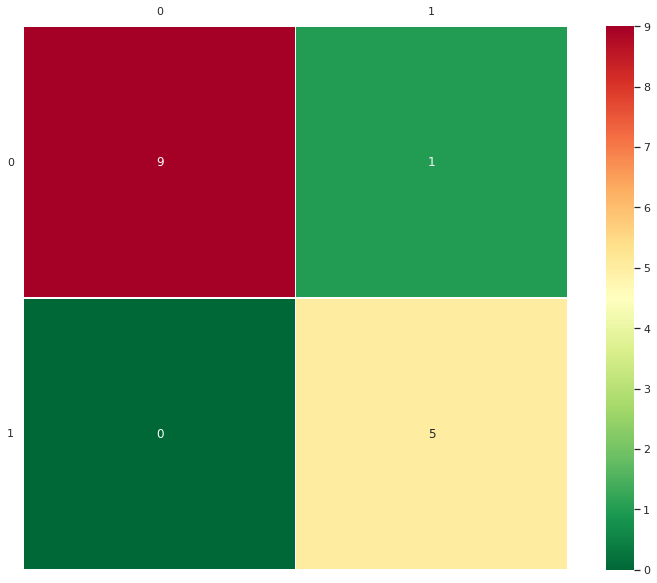

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.900     0.947        10
           1      0.833     1.000     0.909         5

    accuracy                          0.933        15
   macro avg      0.917     0.950     0.928        15
weighted avg      0.944     0.933     0.935        15



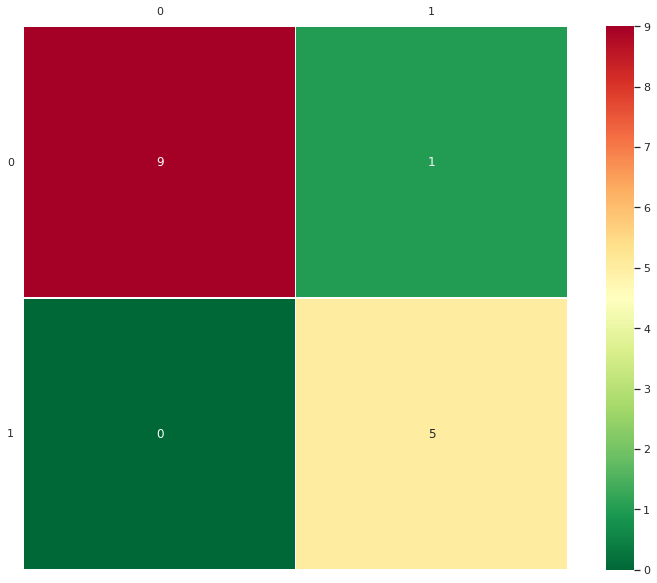

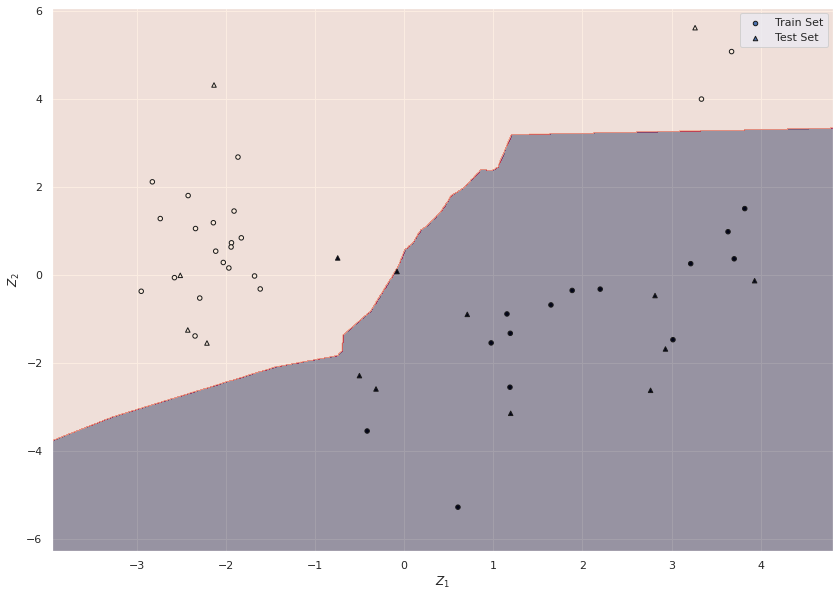

In [761]:
# Hyperparameter grid search for k
from sklearn.neighbors import KNeighborsClassifier  # Edit
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

**ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


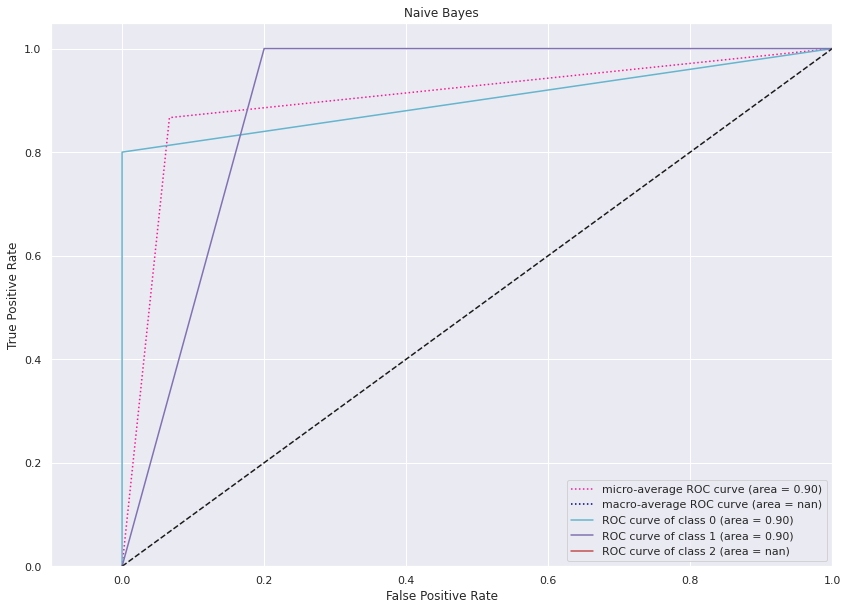

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


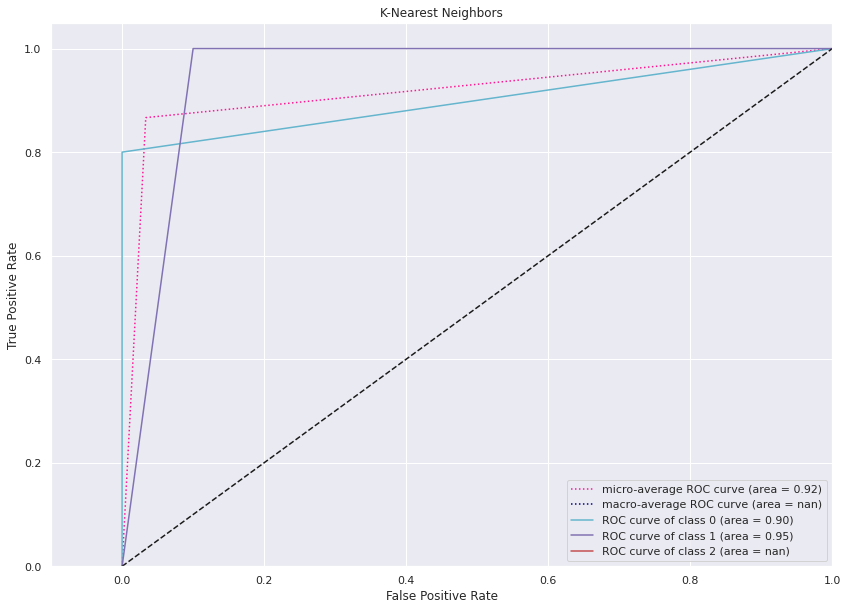

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


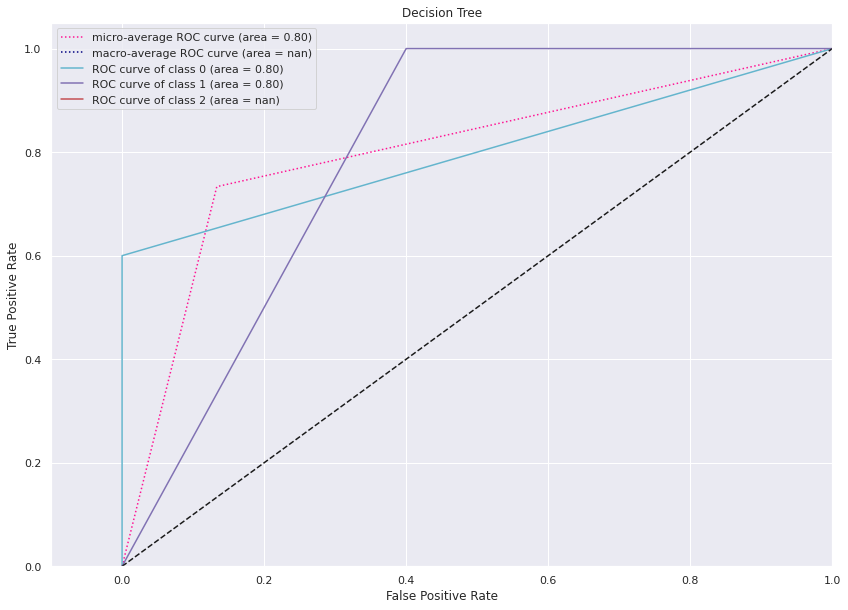

DATASET: Z


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


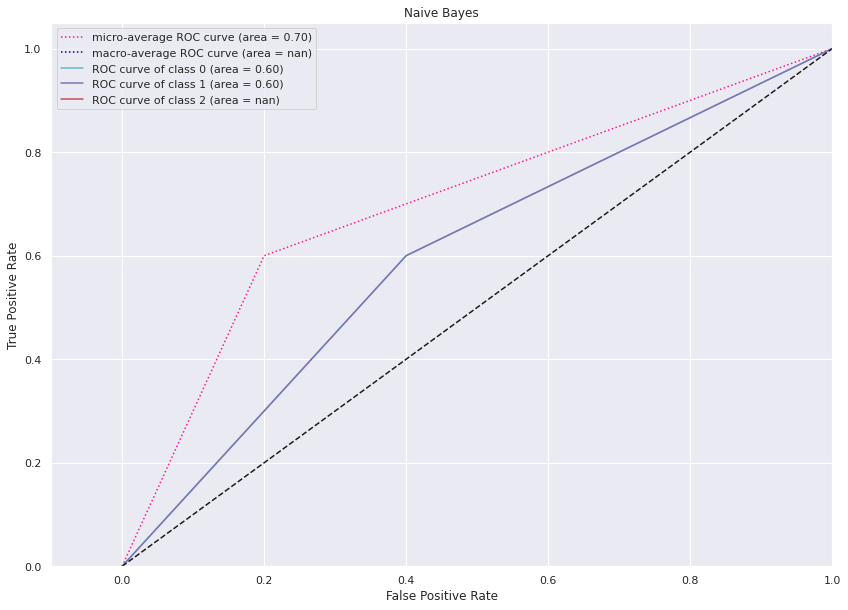

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


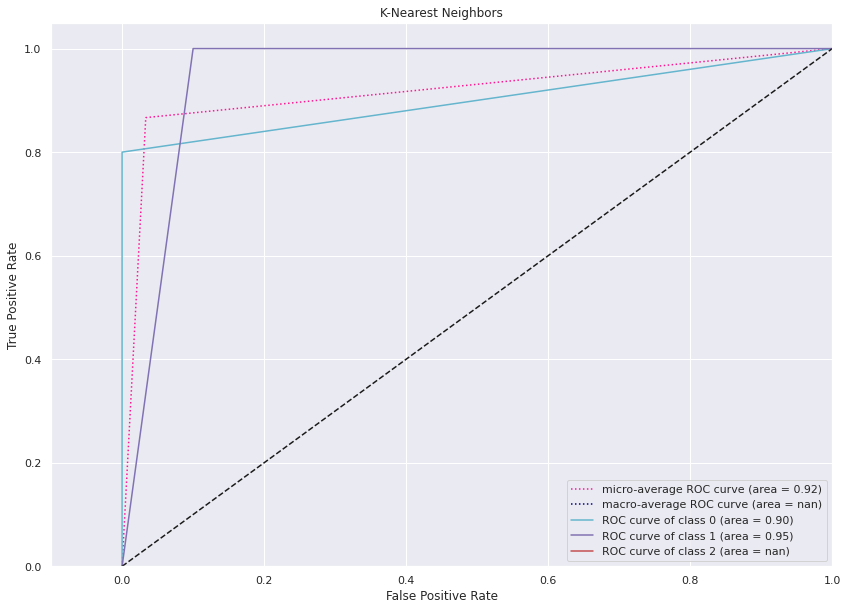

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


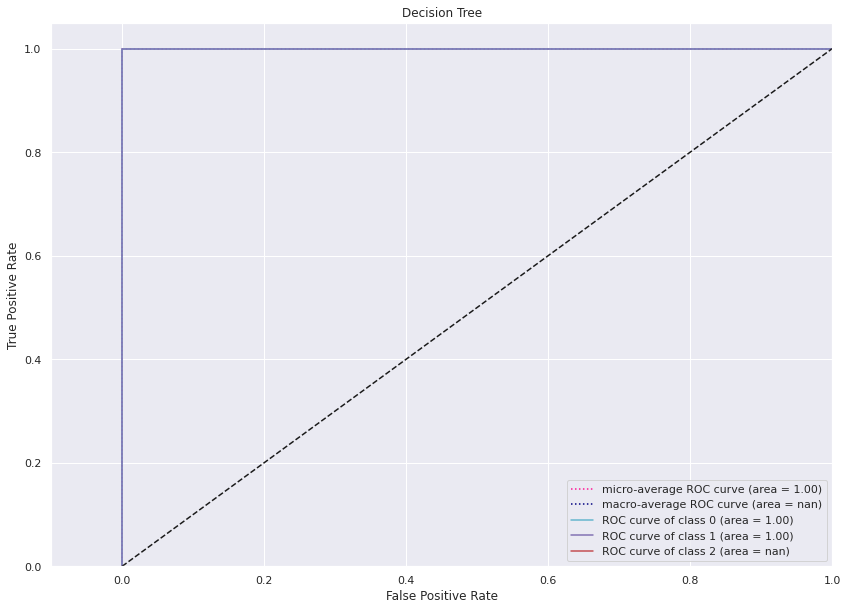

DATASET: Z12


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


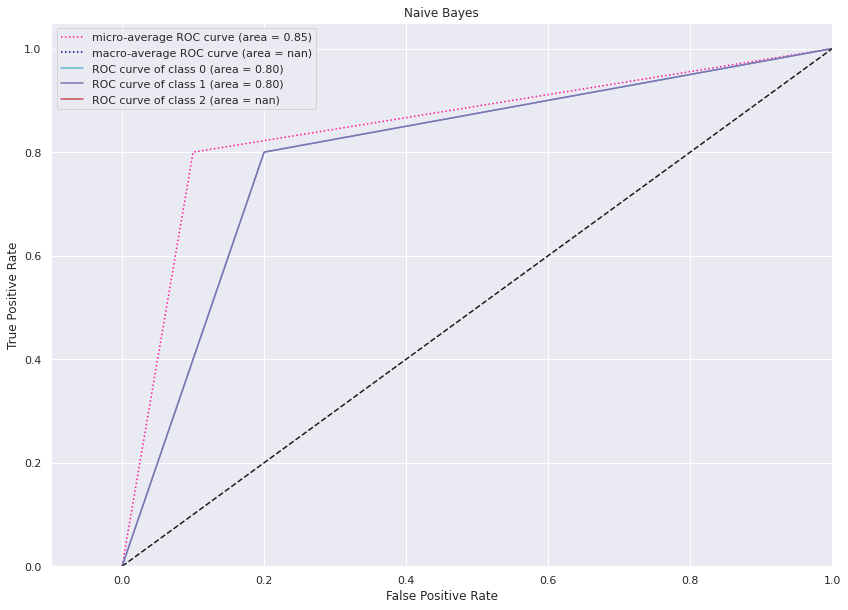

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


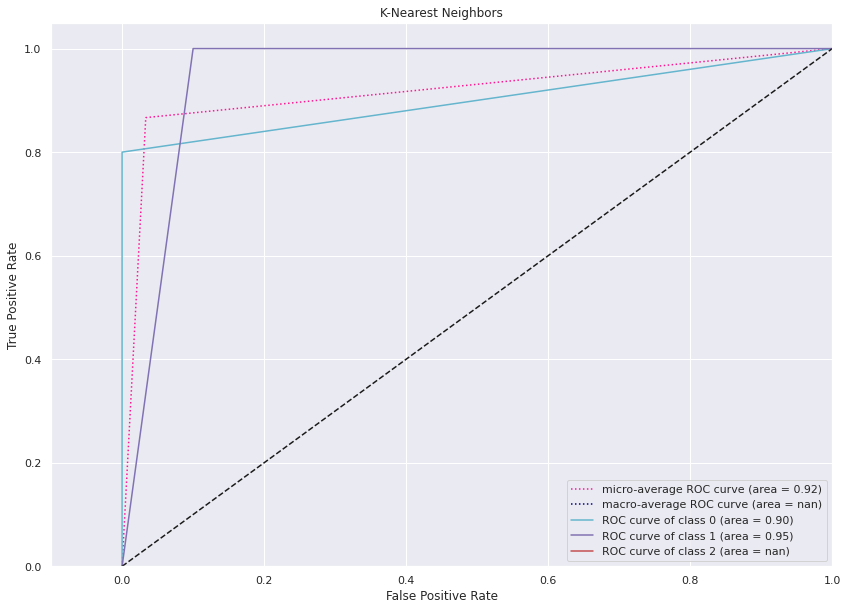

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  else:
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  Sample weights.


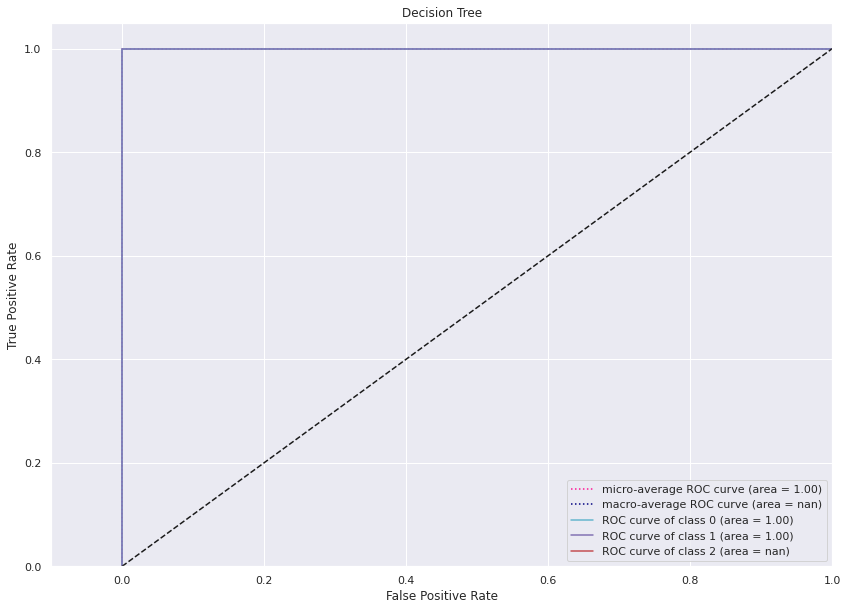

In [762]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
dt = DecisionTreeClassifier(random_state=0)

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()